<a href="https://colab.research.google.com/github/pepean89/03MIAR---Algoritmos-de-Optimizacion---2021/blob/main/Algoritmos_Jose_Andres_AG2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __Actividad Guiada 2 - 03MIAR Algoritmos de Optimizacion__

### Nombre: JOSÉ ANDRÉS RAMÍREZ

https://github.com/pepean89/03MIAR---Algoritmos-de-Optimizacion---2021

## __1. Técnica de búsqueda con ramificación y poda__

### __Problema de asignación de tareas__

In [1]:
costes = [[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]

In [2]:
#Calculo del valor de una solucion parcial
def calcula_valor(s,costes):
    valor = 0
    for i in range(len(s)):
        valor += costes[s[i]][i] 
    return valor

In [3]:
calcula_valor((0,1,2,3), costes)

73

In [4]:
#Coste inferior para soluciones parciales
#  (1,3,) Se asigna la tarea 1 al agente 0 y la tarea 3 al agente 1

def CI(s,costes):
    valor = 0
    #Valores establecidos
    for i in range(len(s)):
        valor += costes[i][s[i]]

    #Estimacion
    for i in range(len(s),len(costes)):
        valor += min([costes[j][i] for j in range(len(s),len(costes))])
    return valor

In [5]:
def CS(s,costes):
    valor = 0
    #Valores establecidos
    for i in range(len(s)):
        valor += costes[i][s[i]]

    #Estimacion
    for i in range(len(s), len(costes)):
        valor += max([costes[j][i] for j in range(len(s),len(costes))])
    return valor

In [6]:
CS((0,1),costes)

74

In [7]:
#Genera tantos hijos como como posibilidades haya para la siguiente elemento de la tupla
#(0,) -> (0,1), (0,2), (0,3)
def crear_hijos(nodo,n):
    hijos = []
    for i in range(n):
        if i not in nodo:
            hijos.append({'s': nodo +(i,)})
    return hijos

In [8]:
def ramificacion_y_poda(costes):
    #Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
    #Nodos del grafo  { s:(1,2),CI:3,CS:5  }
    #print(COSTES)
    dimension = len(costes)  
    mejor_solucion = tuple(i for i in range(len(costes)))
    cota_sup = calcula_valor(mejor_solucion,costes)
    #print("Cota Superior:", CotaSup)

    nodos = []
    nodos.append({'s':(), 'ci':CI((),costes)})

    iteracion = 0

    while len(nodos) > 0:
        
        iteracion += 1

        nodo_prometedor = [min(nodos, key = lambda x: x['ci'])][0]['s']
        #print("Nodo prometedor:", nodo_prometedor)

        #Ramificacion
        #Se generan los hijos
        hijos = [{'s':x['s'], 'ci':CI(x['s'], costes)} for x in crear_hijos(nodo_prometedor,dimension)]

        #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
        nodo_final = [x for x in hijos if len(x['s']) == dimension]
        if len(nodo_final) > 0: 
            #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
            if nodo_final[0]['ci'] < cota_sup:
                cota_sup = nodo_final[0]['ci']
                mejor_solucion = nodo_final
 
        #Poda
        hijos = [x for x in hijos if x['ci'] < cota_sup]

        #Añadimos los hijos 
        nodos.extend(hijos) 

        #Eliminamos el nodo ramificado
        nodos =  [x for x in nodos if x['s'] != nodo_prometedor]
   
    print("La solucion final es:" , mejor_solucion, " en " , iteracion , " iteraciones" , " para dimension ", dimension)

In [9]:
ramificacion_y_poda(costes)

La solucion final es: [{'s': (1, 2, 0, 3), 'ci': 64}]  en  10  iteraciones  para dimension  4


## __2. Descenso del gradiente__

In [10]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!) 
#import scipy as sc
import random

### _Función:_

$$ f(x,y) = x^2 + y^2 $$

In [11]:
#Definimos la funcion
#Paraboloide
f  = lambda x:      x[0]**2+x[1]**2      #Funcion
df = lambda x: [2*x[0] , 2*x[1]]         #Gradiente

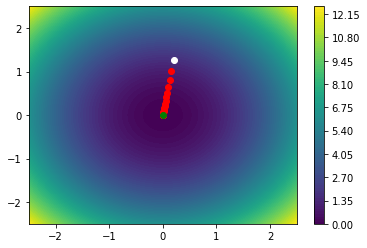

Solucion: [6.999543431672665e-50, 4.407407248896502e-49] 1.9915174740144148e-97


In [12]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100 
rango=2.5
X = np.linspace(-rango,rango,resolucion) 
Y = np.linspace(-rango,rango,resolucion)
Z = np.zeros((resolucion,resolucion))

for ix,x in enumerate(X):
    for iy,y in enumerate(Y):
        Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar() 

#Generamos un punto aleatorio
P = [random.uniform(-2,2 ),random.uniform(-2,2)]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje
TA = 0.1 

#Iteraciones
for _ in range(500):
    grad = df(P)
    #print(P,grad)
    P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
    plt.plot(P[0],P[1],"o",c="red")

plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:",P,f(P))